## Практика 10: Факторний аналіз

Посилання: 

https://rpubs.com/aaronsc32/factor-analysis-introduction

https://rpubs.com/aaronsc32/factor-analysis-part-two

https://rpubs.com/aaronsc32/factor-analysis-iterated-principal-factor 

http://web.stanford.edu/class/psych253/tutorials/FactorAnalysis.html

http://www.yorku.ca/ptryfos/f1400.pdf

https://m-clark.github.io/posts/2020-04-10-psych-explained/ 

In [54]:
library(car)
library(ggplot2)
install.packages("psych", dependencies=TRUE,  repos = "https://mirrors.nics.utk.edu/cran/src/contrib/psych_1.9.12.31.tar.gz")
# library('psych')


Warning message:
"unable to access index for repository https://mirrors.nics.utk.edu/cran/src/contrib/psych_1.9.12.31.tar.gz/src/contrib:
  kann URL 'https://mirrors.nics.utk.edu/cran/src/contrib/psych_1.9.12.31.tar.gz/src/contrib/PACKAGES' nicht öffnen"Warning message:
"package 'psych' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://mirrors.nics.utk.edu/cran/src/contrib/psych_1.9.12.31.tar.gz/bin/windows/contrib/3.6:
  kann URL 'https://mirrors.nics.utk.edu/cran/src/contrib/psych_1.9.12.31.tar.gz/bin/windows/contrib/3.6/PACKAGES' nicht öffnen"

In [45]:
!pip install psych 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unerwartetes Symbol
1: !pip install
         ^


In [5]:
options(repr.plot.width=3.5, repr.plot.height=3.5)

In [2]:
root <- read.table('T6_2_ROOT.DAT',col.names = c('V1', 'V2', 'V3', 'V4', 'V5'))

Обчислимо коваріаційну матрицю та  її власні числа. 

In [3]:
S<- cov(root[,2:5])
S.eigen <- eigen(S)
S.eigen 

eigen() decomposition
$values
[1] 0.495986813 0.162680761 0.006924035 0.001565068

$vectors
           [,1]        [,2]        [,3]       [,4]
[1,] -0.1011191  0.09661363 -0.21551730  0.9664332
[2,] -0.7516463  0.64386366  0.06099466 -0.1294103
[3,] -0.5600279 -0.62651631 -0.52992316 -0.1141384
[4,] -0.3334239 -0.42846553  0.81793239  0.1903481


Останні 2 власних числа близьці до 0. Тому досить обрати кількість факторів   $m=2$.  Можна також зобразити власні числа  графічно:

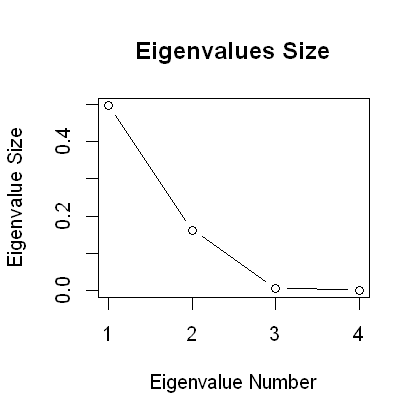

In [6]:
plot(S.eigen$values, xlab = 'Eigenvalue Number', ylab = 'Eigenvalue Size', main = 'Eigenvalues Size', 
     type = 'b', xaxt = 'n')  
axis(1, at = seq(1, 4, by = 1))

Тут  type = b означає, що ми малюємо і лінії і відповідні точки;   xaxt= n означає, що ми самі задаємо, що саме буде відображатися по осі OX, а саме, ми обираємо   axis(1, at = seq(1, 4, by = 1), тобто кількість власних чисел.

Запишимо  матрицю  коваріацій $S$ у вигляді $S = CD^{1/2}D^{1/2}C'$, та знайдемо $C$ та  $D$. Для того, щоб зобразити матрицю  $C$, візьмемо перші 2 власних вектори. Для того, щоб отримати матрицю $D$, ми спочатку створюємо порожню матрицю (але відповідного розміру!), а потім додаємо в неї власні числа. 

In [7]:
C <- as.matrix(S.eigen$vectors[,1:2])
D <- matrix(0, dim(C)[2], dim(C)[2])
diag(D) <- S.eigen$values[1:2]

Запишемо тепер  $\hat{\Lambda} = CD^{1/2}$:

In [8]:
S.loadings <- C %*% sqrt(D)
S.loadings

-0.07121445,0.03896785
-0.52935694,0.25969406
-0.39440707,-0.25269723
-0.23481824,-0.17281602


Ці вектори не нормовані: 

In [17]:
sqrt(sum(S.loadings[,1]**2))

[1] 0.7042633

In [18]:
S.loadings[,1]/ sqrt(sum(S.loadings[,1]**2))

[1] -0.1011191 -0.7516463 -0.5600279 -0.3334239

Все, що ми проробили вище, можна зробити за допомоги вбудованої функції prcomp:

In [9]:
root.pca <- prcomp(root[,2:5])$rotation[,1:2]
root.pca

,PC1,PC2
V2,-0.1011191,0.09661363
V3,-0.7516463,0.64386366
V4,-0.5600279,-0.62651631
V5,-0.3334239,-0.42846553


Ці вектори нормовані: 

In [14]:
sum(root.pca[,1]**2)

[1] 1

Операція  $\$ $rotation  повертає значення власних векторів матриці  $S$ (порівняйте з  застосуванням S.eigen$\$$vectors[,1:2]). 	Операція 
\$sdev  повертає стандартне відхилення компонент: 

In [22]:
root.pca2 <- prcomp(root[,2:5])$sdev
round(root.pca2,3)

[1] 0.704 0.403 0.083 0.040

Обчислимо спільні дисперсії: $\hat{h}_i^2=\sum_{j=1}^m \hat{\lambda}_{ij}^2$:

In [23]:
S.h2 <- rowSums(S.loadings^2)
round(S.h2,3)

[1] 0.007 0.348 0.219 0.085

Тепер знайдемо залишкові дисперсії  $\psi_i = s_{ii}- \hat{h}_i^2$. 

In [25]:
S.u2 <- diag(S) - S.h2
S.u2

V2           V3           V4           V5 
1.783368e-03 5.197004e-05 1.964786e-03 4.688978e-03

Знайдемо пропорції власних чисел: 

In [27]:
prop.loadings <- colSums(S.loadings^2)
prop.var <- cbind(prop.loadings[1] / sum(S.eigen$values), prop.loadings[2] / sum(S.eigen$values))
round(prop.var,3)

0.743,0.244


Тобто, перше власне значення має внесок  0.743 в загальну суму власних значень, а друге  0.244 (з точністю до округлення). Зауважимо, що сума цих двох власних чисел (sum(prop.var)) менша за 1 (sum(prop.var)). 

Якщо виключити інші власні числа, то отримаємо наступні внески: 

In [28]:
prop.exp <- cbind(prop.loadings[1] / sum(prop.loadings),
prop.loadings[2] / sum(prop.loadings))
round(prop.exp,3)

0.753,0.247


З іншого боку, можна застосувати  вбудовану функцію  fa()  з пакету psych. Для цього треба встановити пакет  psych та завантажити бібліотеку.  Проблема ще в тому, що пакет не встановлюється в jupyter, але все працює в RStudio. 

Функція  principal()  виконує факторний аналіз за допомоги методу головних компонент.  Поки що ми не використовуємо ротацію факторів, тому поставили  rotate = 'none'. Єдине що- для аналізу використовується матриці кореляцій, а  не матриця коваріацій

https://m-clark.github.io/posts/2020-04-10-psych-explained/

 

In [36]:
root.fa.covar <- principal(root[,2:5], nfactors = 2, rotate = 'none', covar = TRUE)
root.fa.covar

ERROR: Error in principal(root[, 2:5], nfactors = 2, rotate = "none", covar = TRUE): konnte Funktion "principal" nicht finden


ці результати ми отримаємо, якщо використаємо кореляційну матрицю у попередніх обчисленнях. 

eigen() decomposition
$values
[1] 2.78462702 1.05412174 0.11733950 0.04391174

$vectors
           [,1]       [,2]       [,3]       [,4]
[1,] -0.4713465  0.5600120  0.6431731  0.2248274
[2,] -0.5089667  0.4544775 -0.7142114 -0.1559013
[3,] -0.5243109 -0.4431448  0.2413716 -0.6859012
[4,] -0.4938456 -0.5324091 -0.1340527  0.6743048


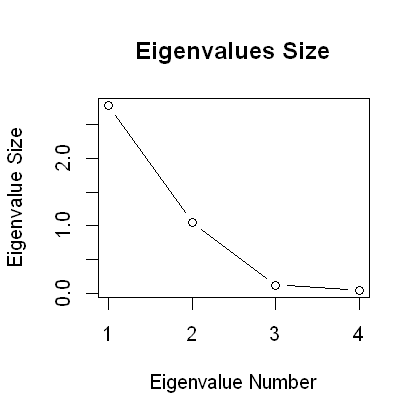

In [82]:
R<- cor(root[,2:5])
R.eigen <- eigen(R)
R.eigen
plot(R.eigen$values, xlab = 'Eigenvalue Number', ylab = 'Eigenvalue Size', main = 'Eigenvalues Size', 
type = 'b', xaxt = 'n')
axis(1, at = seq(1, 4, by = 1))

In [79]:
R.eigen

eigen() decomposition
$values
[1] 2.78462702 1.05412174 0.11733950 0.04391174

$vectors
           [,1]       [,2]       [,3]       [,4]
[1,] -0.4713465  0.5600120  0.6431731  0.2248274
[2,] -0.5089667  0.4544775 -0.7142114 -0.1559013
[3,] -0.5243109 -0.4431448  0.2413716 -0.6859012
[4,] -0.4938456 -0.5324091 -0.1340527  0.6743048


In [61]:
sqrt(sum(R.eigen$vectors[,1]**2))

[1] 1

Нормовані! Вектори, отримані за допомогою - fa() ні. 

Зобразимо  $R$  у вигляді $R = CR (DR)^{1/2} (DR)^{1/2}CR'$ та знайдемо  $CR$ та $DR$.

In [63]:
CR <- as.matrix(R.eigen$vectors[,1:2])
DR <- matrix(0, dim(CR)[2], dim(CR)[2])
diag(DR) <- R.eigen$values[1:2]
R.loadings <- CR %*% sqrt(DR)
R.loadings

-0.7865453,0.5749668
-0.8493229,0.4666140
-0.8749282,-0.4549787
-0.8240901,-0.5466267


R.loadings - це як раз  вектори $PC1$, $PC2$, які знайдено функцією principal(). 

Обчислимо тепер  $\hat{h}_i^2= \sum_{j=1}^m \hat{\lambda}_{ij}^2$  та $\psi_i = r_{ii}-\hat{h}_i^2$

In [66]:
R.h2 <- rowSums(R.loadings^2)
round(R.h2,2)

[1] 0.95 0.94 0.97 0.98

Обчислимо SS loadings: 

In [68]:
R.eigen$values[1:2]

[1] 2.784627 1.054122

Далі, залишкова дисперсія:

In [70]:
R.u2 <- diag(R) - R.h2
round(R.u2,3)

V2    V3    V4    V5 
0.051 0.061 0.027 0.022

Середню дисперсію можна обчислити наступним чином: 

In [73]:
comR <- rowSums(R.loadings^2)^2 / rowSums(R.loadings^4)
round(comR,1)

[1] 1.8 1.6 1.5 1.7

Чим ближчі ці значення до 1, тим краще обрані фактори пояснюють модель. 


Функція varimax()  дозволяє знайти найкращу комбінацію факторів (тобто здійснити ''поворот'' осей) для того, щоб знайти найкращі навантаження.  Найкращим розв'язком був би такий, в якому складність була б близькою до 1, що в свою чергу означає, що одна змінна найкраще пояснюється одним фактором. 

А саме  (метод Кайзера),  шукаємо таку ортогональну  матрицю $T$, яка б максимізувала   таку різницю моментів: 
$$
\frac1p \sum_{j=1}^k \sum_{i=1}^p (\Lambda T)_{ij}^4 - \sum_{j=1}^k \left(\frac1p \sum_{i=1}^p (\Lambda T)_{ij}^2 \right)^2\Longrightarrow  \max.
$$ 
Фактично, ми при цьому змінюємо базис, та знаходимо нову матрицю навантажень $\Lambda$. Елементи цієї матриці називаються loadings. 

В результати ми отримали б $\Lambda^* = \Lambda T$, де матриця  $T$ є ортогональною та такою, що максимізує дисперсії  навантажень в кожному стовбчику матриці  $\Lambda^*$.
Зауважимо, що при цьому середні дисперсії не змінюються: ортогональне перетворення не змінює власні числа. 

In [74]:
root.fa2 <- principal(root[,2:5], nfactors = 2, rotate = 'varimax')
root.fa2

ERROR: Error in principal(root[, 2:5], nfactors = 2, rotate = "varimax"): konnte Funktion "principal" nicht finden


Розглянемо аналіз методом головних факторів.  Для цього оцінимо 
$$
\hat{h}_i^2 = 1- \frac{1}{r_{ii}}.
$$
Потім ми замінимо  діагональні елементи $R$ на R.smc (R.smc  - це squared multiple correlation): 

In [83]:
R.smc <- (1 - 1 / diag(solve(R)))
diag(R) <- R.smc
print(round(R.smc,2))
round(R, 2)

  V2   V3   V4   V5 
0.80 0.81 0.91 0.91 


,V2,V3,V4,V5
V2,0.80,0.88,0.44,0.33
V3,0.88,0.81,0.52,0.45
V4,0.44,0.52,0.91,0.95
V5,0.33,0.45,0.95,0.91


Тепер знайдемо власні числа та власні вектори матриці 
$R-\hat{\Psi}$. 

In [85]:
r.eigen <- eigen(R)
print(round(r.eigen$values,2))

[1]  2.65  0.91 -0.03 -0.09


Матриця $R$  вже не є додатньо визначеною, оскільки ми вже замінили елементи на діагоналі їх оцінками. Отже, можуть бути декільки від'ємних власних чисел. 
Оскільки від'ємні власні числа не використовуються для оцінки $\lambda$, оберемо  $m=2$.

In [86]:
r.lambda <- as.matrix(r.eigen$vectors[,1:2]) %*% diag(sqrt(r.eigen$values[1:2]))
round(r.lambda,2)

-0.74,0.54
-0.80,0.45
-0.88,-0.41
-0.83,-0.50


Обчислимо середні дисперсії (communalities),  (specific variances) та складність навантажень: 

In [87]:
r.h2 <- rowSums(r.lambda^2)
r.u2 <- 1 - r.h2
com <- rowSums(r.lambda^2)^2 / rowSums(r.lambda^4)

Зберемо результати в наступну  data.frame.

In [88]:
cor.pa <- data.frame(cbind(round(r.lambda, 2), 
round(r.h2, 2), round(r.u2, 3), round(com, 1)))
colnames(cor.pa) <- c('PA1', 'PA2', 'h2', 'u2', 'com')
cor.pa

PA1,PA2,h2,u2,com
-0.74,0.54,0.84,0.158,1.8
-0.80,0.45,0.85,0.150,1.6
-0.88,-0.41,0.93,0.067,1.4
-0.83,-0.50,0.93,0.072,1.6


Застосуємо тепер вбудовану функцію fa().  Функція  fa()  може застосовувати  ітеративно метод головних факторів до тих пір, поки ми не отримуємо задовільний результат.  

In [ ]:
#root.cor.fa <- fa(root[,2:5], nfactors = 2, rotate = 'none', 
#fm = 'pa', max.iter = 1)
#root.cor.fa